In [1]:
from cmdstanpy import install_cmdstan
install_cmdstan(verbose=True)

Installing CmdStan version: 2.29.1
Install directory: /Users/kamilbaradziej/.cmdstan
Download successful, file: /var/folders/3c/q2s2z4v92bx59zp2nvycr10c0000gn/T/tmpr_o6rajh
Extracting distribution
Unpacked download as cmdstan-2.29.1
Building version cmdstan-2.29.1, may take several minutes, depending on your system.

--- CmdStan v2.29.1 built ---
Test model compilation

--- Translating Stan model to C++ code ---
bin/stanc  --o=examples/bernoulli/bernoulli.hpp examples/bernoulli/bernoulli.stan

--- Compiling, linking C++ code ---
clang++ -std=c++1y -Wno-unknown-warning-option -Wno-tautological-compare -Wno-sign-compare -D_REENTRANT -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -DBOOST_DIS

True

In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [5]:
F = len('Kamil')
L = len('Baradziej')

## Excercise 1 - Generated Quantities Block

In [4]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,9.25448,10.0,12.0,12.0,7.0,8.0
1,0.0,0.0,112.32300,108.0,107.0,103.0,112.0,115.0
2,0.0,0.0,152.78100,165.0,154.0,159.0,136.0,158.0
3,0.0,0.0,184.42500,191.0,188.0,182.0,195.0,180.0
4,0.0,0.0,180.24500,197.0,182.0,214.0,191.0,165.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,84.44720,90.0,87.0,90.0,94.0,77.0
996,0.0,0.0,10.46150,12.0,13.0,12.0,11.0,4.0
997,0.0,0.0,34.56810,32.0,30.0,35.0,39.0,23.0
998,0.0,0.0,1.40162,0.0,3.0,3.0,0.0,4.0


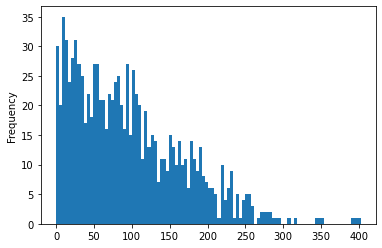

In [11]:
Lambda = df['lambda']
Lambda.plot.hist(bins=100)
plt.show()

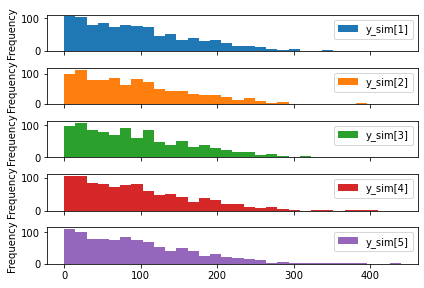

In [13]:
df2 = df.drop(df.columns[0:3],axis=1) 
df2.plot.hist(subplots=True, bins=30) 
plt.tight_layout()
plt.show()

## Excercise 2 - constraints on the data



In [5]:
bern2 = CmdStanModel(stan_file='code_2.stan')
bern2_2 = CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})
samp_bern2_2 = bern2_2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:CmdStan start processing
ERROR:cmdstanpy:Error in progress bar initialization:
	IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Disabling progress bars for this session


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


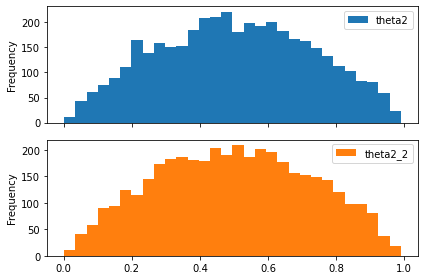

In [7]:
theta2 = samp_bern2.stan_variable('theta')
theta2_2 = samp_bern2_2.stan_variable('theta')
df = pd.DataFrame({'theta2': theta2, 'theta2_2': theta2_2}) 
df.plot.hist(subplots=True, bins=30)
plt.tight_layout()
plt.show()

## Excercise 3 - constraints on the parameters


#### Unconstrained parameters

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:Chain [3] done processing
Exception ignored in: <function tqdm.__del__ at 0x7fcca3ca3790>
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/tqdm/std.py", line 1122, in __del__
    self.close()
  File "/usr/local/anaconda3/envs/DataAnalytics/lib/python3.8/site-packages/tqdm/notebook.py", line 261, in close
    self.sp(bar_style='danger')
AttributeError: 'tqdm' object has no attribute 'sp'


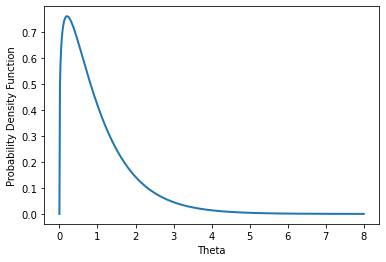

In [7]:
model_gm3 = CmdStanModel(stan_file='code_4.stan')
out_gamma3 = model_gm3.sample(output_dir='samples', iter_sampling=5000, iter_warmup=1000, seed=4838282) 
out_gamma3.diagnose()

N=550
xs3 = np.linspace(0, 8, N)
p3 = stats.gamma.pdf(xs3, 1.25, scale = 1 / 1.25)
plt.plot(xs3, p3, linewidth=2)
plt.gca().set_xlabel("Theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

Diagnostic message: 
Rejecting initial value:
         Log probability evaluates to log(0), i.e. negative infinity.
         Stan can't start sampling from this initial value.
         
That happens for negative thetas but stan somehow manages to fix this on its own!!!

#### Constrained parameter

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] done processing


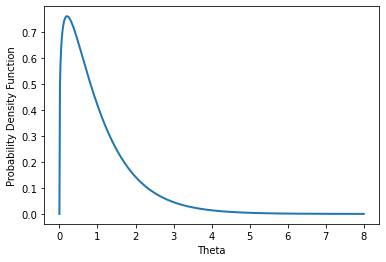

In [8]:
model_gm3_2 = CmdStanModel(stan_file='code_5.stan')
out_gamma3_2 = model_gm3_2.sample(output_dir='samples', iter_sampling=6000, iter_warmup=1000, seed=4838282) 
out_gamma3_2.diagnose()

N=550
xs3 = np.linspace(0, 8, N)
p3 = stats.gamma.pdf(xs3, 1.25, scale = 1 / 1.25)
plt.plot(xs3, p3, linewidth=2)
plt.gca().set_xlabel("Theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

There are no warning messages.

## Excercise 4 - functions and different functionalities of stan



In [12]:
model_tune_4 = CmdStanModel(stan_file='code_6.stan')
# done earlier

y0 = 1# initial guess for the equation solving
data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune_4.sample(data=data, fixed_param=True, iter_sampling=1,iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


,lp__,accept_stat__,sigma
0,0.0,0.0,2.71757


## Excercise 5 - different methods of defining models

In [13]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')

data = {'N': F}
seed = 13071997 
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing
INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:

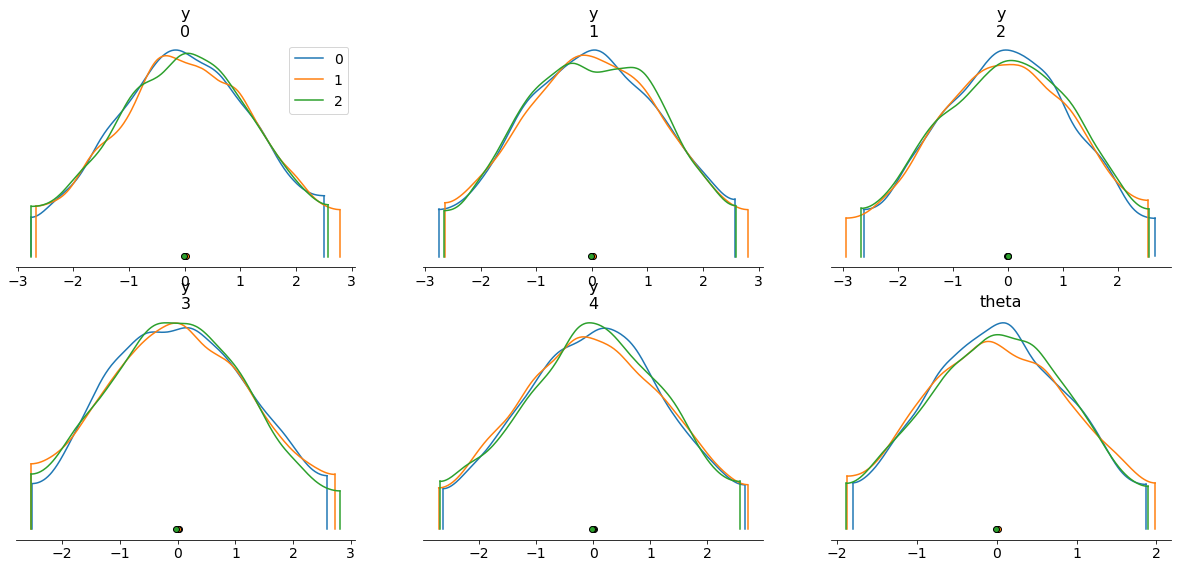

In [14]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling


In [22]:
model_gq = CmdStanModel(stan_file='code_10.stan')
print(model_gq.code())
mean_of_y = model_gq.generate_quantities(data=data, mcmc_sample = result_2)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


data {
    int<lower=1> N;
}
parameters {
   real y[N];
   real theta;
}
model {
    y ~ normal(theta, 1);
    theta ~ normal(0, 1);
}
generated quantities {
   real mean_y = mean(y);
}


(array([   2.,   15.,  157.,  451.,  870., 1105.,  828.,  414.,  137.,
          21.]),
 array([-4.38189 , -3.578089, -2.774288, -1.970487, -1.166686, -0.362885,
         0.440916,  1.244717,  2.048518,  2.852319,  3.65612 ]),
 <BarContainer object of 10 artists>)

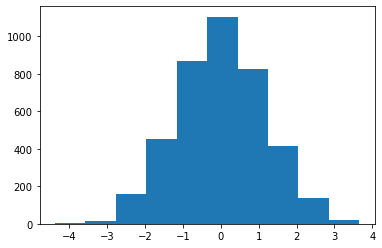

In [23]:
plt.hist(mean_of_y.stan_variable('mean_y'))